In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
df = pd.read_csv('T_UWWTPS.csv')
df_toclean = pd.DataFrame(data = {'aggID': df['aggID'],'Latitude': df['uwwLatitude'],'Longitude': df['uwwLongitude'],
                                  'LoadEntering': df['uwwLoadEnteringUWWTP'],'Capacity': df['uwwCapacity']})
df_indexed = df_toclean.set_index('aggID')
df_no_missing = df_indexed.dropna()
df_no_missing_zeros = df_no_missing[np.all(df_no_missing != 0, axis=1)] # remove rows have zero
print(len(df_no_missing), len(df_no_missing_zeros))

22877 21945


In [3]:
# linear regression
x = df_no_missing_zeros['LoadEntering']
y = df_no_missing_zeros['Capacity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
regr = linear_model.LinearRegression()
regr.fit(x_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_predict = regr.predict(x_test.values.reshape(-1, 1))
print('β0 and β1: ', regr.intercept_, regr.coef_[0])

β0 and β1:  [3260.10897747] [1.17885606]


Text(0,0.5,'Capacity')

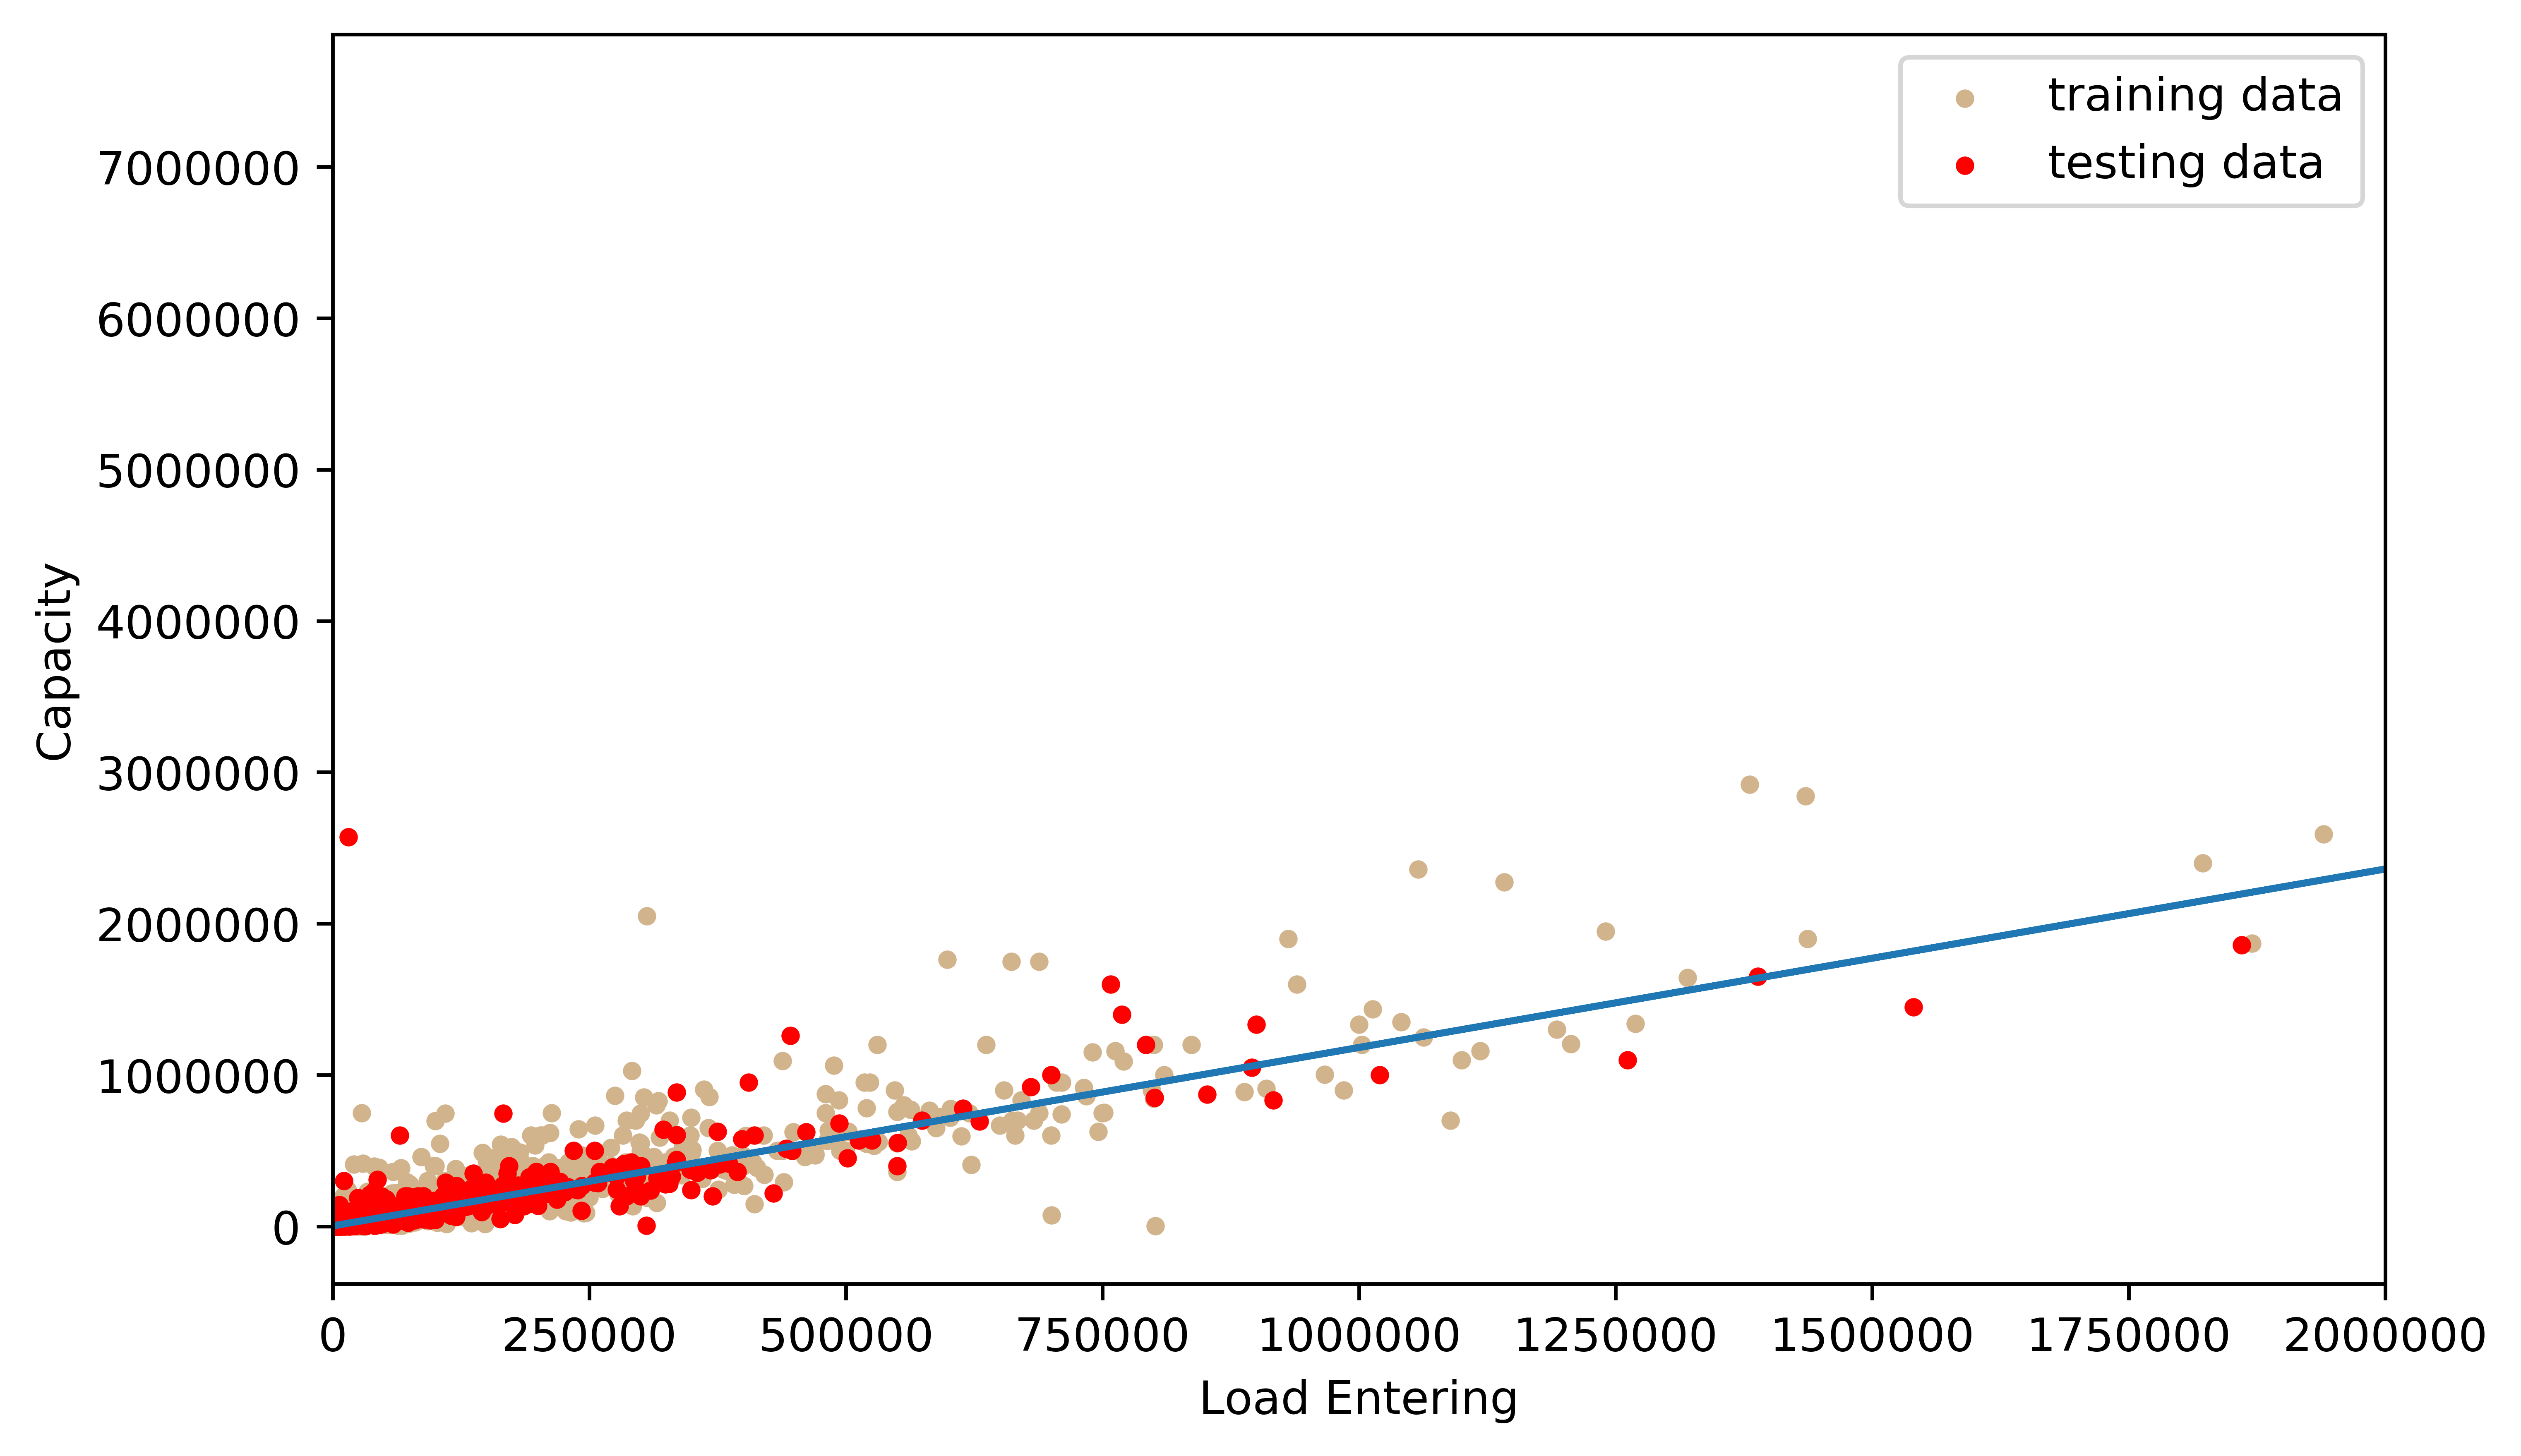

In [4]:
plt.subplots(figsize = (8, 5), dpi = 800)
plt.scatter(x_train, y_train, c='tan', marker = '.', label = 'training data')
plt.scatter(x_test, y_test, c='r', marker = '.', label = 'testing data')
plt.plot(x_test, y_predict)
plt.xlim(xmin=0, xmax=2000000)
plt.legend()
plt.xlabel('Load Entering')
plt.ylabel('Capacity')